In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Step 1: Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images (28x28 pixels to 784 input features)
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Step 2: Build the MLP model
model = Sequential([
    Dense(128, activation='relu', input_shape=(28 * 28,)),  # Hidden layer with 128 neurons
    Dense(64, activation='relu'),  # Another hidden layer
    Dense(10, activation='softmax')  # Output layer with 10 neurons (digits 0-9)
])

# Step 3: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 4: Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Step 5: Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


C:\Users\shahe\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8583 - loss: 0.4793 - val_accuracy: 0.9579 - val_loss: 0.1428
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9629 - loss: 0.1215 - val_accuracy: 0.9628 - val_loss: 0.1218
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9770 - loss: 0.0726 - val_accuracy: 0.9690 - val_loss: 0.1030
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9834 - loss: 0.0538 - val_accuracy: 0.9688 - val_loss: 0.1069
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9872 - loss: 0.0423 - val_accuracy: 0.9700 - val_loss: 0.1156
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9673 - loss: 0.1103
Test Accuracy: 97.12%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


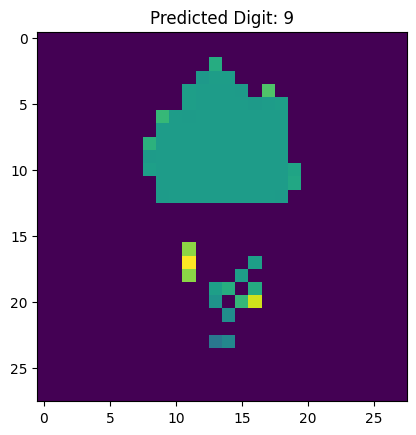

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Function to preprocess the image and make a prediction
def preprocess_and_predict(img_path):
    # Load the image
    img = image.load_img(img_path, color_mode="grayscale", target_size=(28, 28))

    # Convert the image to a numpy array
    img_array = image.img_to_array(img)

    # Normalize the image
    img_array = img_array.astype('float32') / 255.0

    # Reshape the image to match the input shape (28 * 28 = 784)
    img_array = img_array.reshape(1, 28 * 28)

    # Make a prediction
    prediction = model.predict(img_array)

    # Return the predicted class (digit)
    predicted_class = np.argmax(prediction)
    return predicted_class

# Example usage
img_path = 'Image.png'  # Replace with the path to your MNIST image
predicted_digit = preprocess_and_predict(img_path)

# Show the image and the predicted digit
img = image.load_img(img_path, color_mode="grayscale", target_size=(28, 28))
plt.imshow(img)
plt.title(f'Predicted Digit: {predicted_digit}')
plt.show()
